# **Libraries**

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
img_size = (224, 224)

In [3]:
# Set seeds for reproducibility
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

# **Pre Processing**

In [4]:
#Image Augmentation using Image Data Generator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [5]:
# Loading and augmenting training data
# label encoding performed implicitly by flow_from_directory()
train_generator = datagen.flow_from_directory(
    '/kaggle/input/resume-dataset-2-class/Resume Dataset/train/',
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Found 200 images belonging to 2 classes.


In [6]:
# Loading test data
# label encoding performed implicitly by flow_from_directory()
test_generator = datagen.flow_from_directory(
    '/kaggle/input/resume-dataset-2-class/Resume Dataset/test/',
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 100 images belonging to 2 classes.


In [7]:
# Creating a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
# Compile the model
from tensorflow.keras.optimizers import Adam
#optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate as needed
model.compile(optimizer= 'Adam', loss='binary_crossentropy', metrics=['accuracy'])

#  **Training**

In [14]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=len(train_generator),
                    validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/50
7/7 [==============================] - 10s 1s/step - loss: 1.2801 - accuracy: 0.4900 - val_loss: 0.7128 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: 0.7120 - accuracy: 0.5050 - val_loss: 0.7137 - val_accuracy: 0.5400
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 0.6701 - accuracy: 0.5800 - val_loss: 0.7014 - val_accuracy: 0.6300
Epoch 4/50
7/7 [==============================] - 9s 1s/step - loss: 0.6779 - accuracy: 0.5650 - val_loss: 0.6980 - val_accuracy: 0.5900
Epoch 5/50
7/7 [==============================] - 10s 1s/step - loss: 0.6711 - accuracy: 0.5800 - val_loss: 0.7451 - val_accuracy: 0.5300
Epoch 6/50
7/7 [==============================] - 10s 1s/step - loss: 0.6546 - accuracy: 0.5850 - val_loss: 0.6753 - val_accuracy: 0.7500
Epoch 7/50
7/7 [==============================] - 9s 1s/step - loss: 0.6596 - accuracy: 0.6500 - val_loss: 0.6920 - val_accuracy: 0.6900
Epoch 8/50
7/7 [======================

# Evaluation

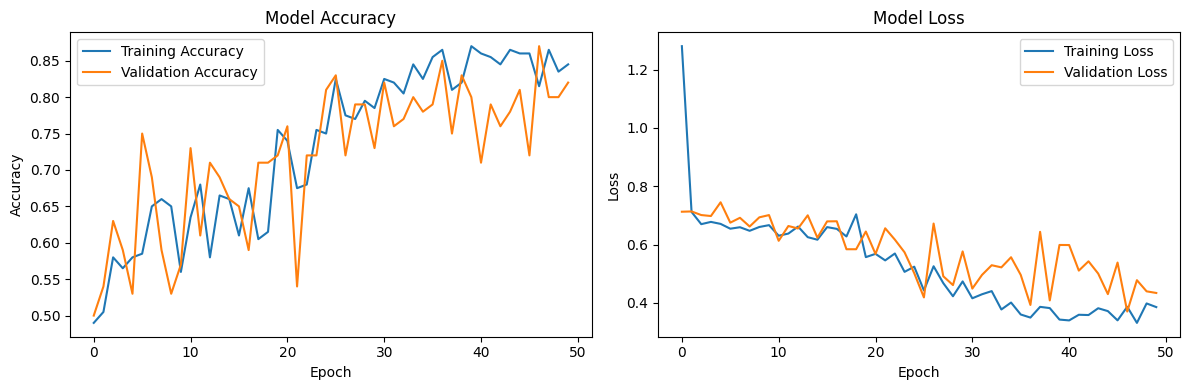

In [15]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
# Model Evaluation
train_scores = model.evaluate(train_generator)
val_scores = model.evaluate(test_generator)
test_scores = model.evaluate(test_generator)

# Printing the accuracy
print("Training Accuracy: %.2f%%" % (train_scores[1] * 100))
print("Validation Accuracy: %.2f%%" % (val_scores[1] * 100))
print("Testing Accuracy: %.2f%%" % (test_scores[1] * 100))


4/4 [==============================] - 3s 595ms/step - loss: 0.3971 - accuracy: 0.8600
Training Accuracy: 88.00%
Validation Accuracy: 83.00%
Testing Accuracy: 86.00%


**Confusion Matrix**

1/4 [======>.......................] - ETA: 4s

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 [==============================] - 3s 609ms/step


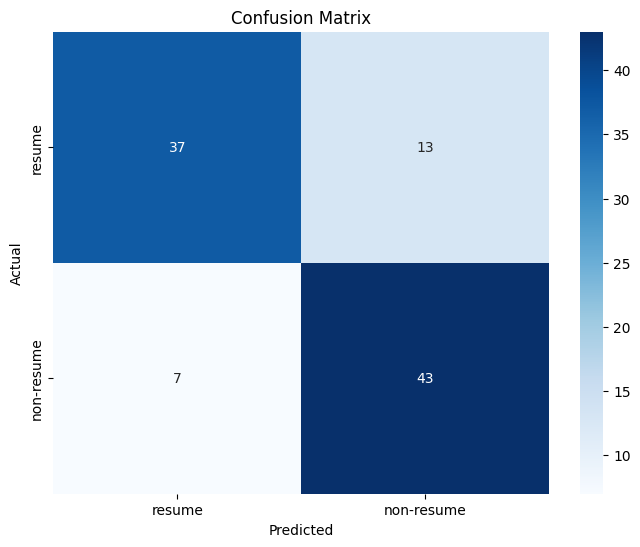

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_true = test_generator.classes
y_pred = model.predict(test_generator).round()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['resume', 'non-resume'], yticklabels=['resume', 'non-resume'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Extracting TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Display Values
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")


True Positives: 43
True Negatives: 37
False Positives: 13
False Negatives: 7


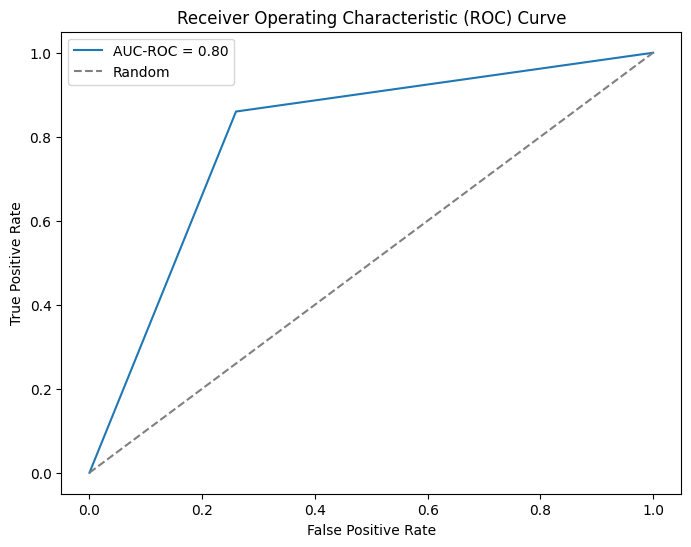

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute AUC-ROC
auc_roc = roc_auc_score(y_true, y_pred)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [27]:
# Calculating metrics using classification report
report = classification_report(y_true, y_pred, target_names=['resume', 'non-resume'])

# Displaying classification report
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      resume       0.84      0.74      0.79        50
  non-resume       0.77      0.86      0.81        50

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



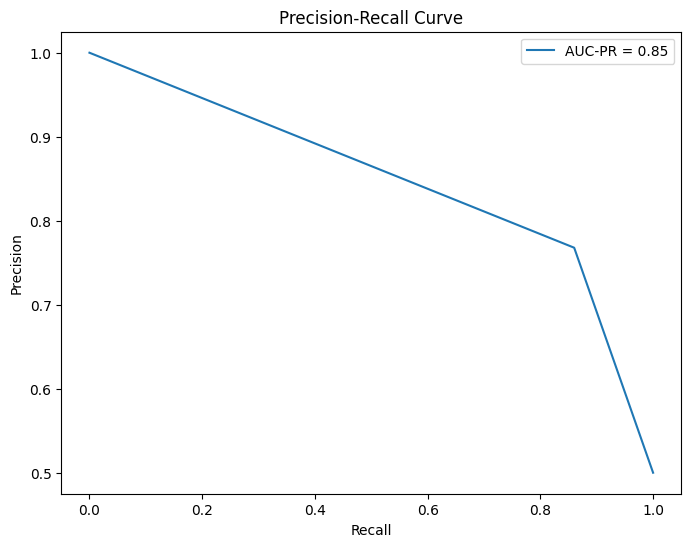

In [28]:
from sklearn.metrics import auc, precision_recall_curve

# Compute AUC-PR
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_pr = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()
